In [4]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import datetime
from collections import defaultdict
pd.set_option('display.max_colwidth', None)
import mglearn as mglearn


## Working with Text Data

### Types of data represented as strings
#### Example application: Sentiment analysis of movie reviews

In [1]:
from sklearn.datasets import load_files
reviews_train=load_files('aclImdb/train')
text_train,y_train=reviews_train.data,reviews_train.target
print("type of text_train:  {}".format(type(text_train)))
print("length of text_train:{}".format(len(text_train)))
#print('text_train[6]:\n{}'.format(text_train[6]))

type of text_train:  <class 'list'>
length of text_train:25000


In [2]:
#clean the HTML line breaks
text_train=[doc.replace(b"<br />", b" ") for doc in text_train]

In [5]:
print("Samples per class(training): {}".format(np.bincount(y_train)))

Samples per class(training): [12500 12500]


In [ ]:
reviews_test = load_files("aclImdb/test")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

In [ ]:
#take a look at the data
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
#print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

In [63]:
df_paper3=pd.read_csv("paper3_tweets.csv")
df_paper3.id.value_counts()


1230972137197846528    1
1434659506571538432    1
1434654967868977152    1
1434655068758765568    1
1434655406199083008    1
                      ..
1469899360750252032    1
1469917432047235072    1
1469925991879516160    1
1469940265263812608    1
1484442232547692546    1
Name: id, Length: 5451, dtype: int64

In [8]:
from sklearn.datasets import load_files
data=df_paper3.content
reviews_train = load_files("data")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[0]:\n{}".format(text_train[0]))

type of text_train: <class 'list'>
length of text_train: 2
text_train[0]:
b'{\n "cells": [\n  {\n   "cell_type": "code",\n   "execution_count": 1,\n   "id": "ec81da22",\n   "metadata": {},\n   "outputs": [],\n   "source": [\n    "import os\\n",\n    "import pandas as pd\\n",\n    "import numpy as np\\n",\n    "import matplotlib.pyplot as plt\\n",\n    "%matplotlib inline\\n",\n    "import seaborn as sns"\n   ]\n  },\n  {\n   "cell_type": "code",\n   "execution_count": 2,\n   "id": "2daf9841",\n   "metadata": {},\n   "outputs": [\n    {\n     "data": {\n      "text/plain": [\n       "2020-01    211\\n",\n       "2019-12    179\\n",\n       "2020-02    110\\n",\n       "Name: year, dtype: int64"\n      ]\n     },\n     "execution_count": 2,\n     "metadata": {},\n     "output_type": "execute_result"\n    }\n   ],\n   "source": [\n    "tweets_df2019 = pd.read_json(\'text-query-tweets2019.json\', lines=True)\\n",\n    "tweets_df2019[\'retweet_count\'] = tweets_df2019[\'retweetCount\']\\n",

In [9]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [10]:
np.unique(y_train)

array([0])

In [11]:
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [2]


In [14]:
reviews_test = load_files("data")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 2
Samples per class (test): [2]


### Representing text data as Bag of Words

![bag_of_words](images/bag_of_words.png)

#### Applying bag-of-words to a toy dataset

In [15]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [17]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [18]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [19]:
print("Dense representation of bag_of_words:\n{}".format(
    bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### Bag-of-word for movie reviews

In [20]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<2x5976 sparse matrix of type '<class 'numpy.int64'>'
	with 6235 stored elements in Compressed Sparse Row format>


In [21]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 5976
First 20 features:
['00', '0000', '000000', '003275', '004642', '0072f9e8', '01', '01hsj8h3glzrdnt4p7aj8znz', '01p782ytt8', '01u6d5pikz5s', '02', '02392441234', '026c4623', '029555', '02xffljj9o', '03', '032905', '032kas0apovktn', '03rozopmga5xffq8i0qs7j6lu3d0947t27fpe3eaaabm0b6pthb3i5kkqg4devtl', '03wzyb5b']
Features 20010 to 20030:
[]
Every 2000th feature:
['00', 'eb5', 'prdfvq8biveb3a4k5rr2bqy4ngi4u8ajdsmfun8lqrehvq7gbv8']


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=2)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: nan


/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=2)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [28]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

AttributeError: 'GridSearchCV' object has no attribute 'scorer_'

In [29]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

ValueError: max_df corresponds to < documents than min_df

In [30]:
feature_names = vect.get_feature_names()

print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00', '0000', '000000', '003275', '004642', '0072f9e8', '01', '01hsj8h3glzrdnt4p7aj8znz', '01p782ytt8', '01u6d5pikz5s', '02', '02392441234', '026c4623', '029555', '02xffljj9o', '03', '032905', '032kas0apovktn', '03rozopmga5xffq8i0qs7j6lu3d0947t27fpe3eaaabm0b6pthb3i5kkqg4devtl', '03wzyb5b', '04', '0478882f', '049894', '05', '05rmysdlrn74pj90camd78kfv', '06', '0692334917582649', '06ft', '06llpuaad8tpzq1', '06sqhlpd8xptkohqbm', '07', '075325', '079564', '07ds3t99', '07sb5cvr9cydn727rzlq21y2ynrkqbjfn7jm9urx1jkf99f1x1axle54fodvpgsrbaslnnr09yypi', '07v33ng3fnejxdmbafz7hvslb', '07xphpkm601n7bne8ysb', '08', '0829951b', '08mys3ib9nwb907rgxkvx79on6jaraveihb38n6', '09', '09p', '0agaawf61n0prrxtxxgaaald7obwqdqqq366q14z9d66qr8ynb609ziukbaaayp', '0aiwvufnp4yb1xk2urlwar3unhu8kohs30m37d962i', '0ayrqyptdc0h5c2tysslxzf5em7bngkf7nqsd', '0b2ojudyem90my7arg8nh0jcaumzvbzpodzxe7knjhzowkm', '0bxpg93okjjtgvprsz8gt5po56yoe9lj9l5pue6ygv98k8no6o9r37', '0cf54dea', '0d0931b3', '0de7tgafgnrmkfgd7

In [31]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=2.

### Stop-words

In [43]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['keep', 'of', 'has', 'being', 'detail', 'already', 'see', 'ltd', 'across', 'over', 'in', 'such', 'inc', 'bottom', 'twelve', 'you', 'yourselves', 'thence', 'sometimes', 'how', 'she', 'however', 'third', 'whereas', 'sincere', 'otherwise', 'couldnt', 'hers', 'latterly', 'whither', 'per', 'what']


In [44]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=2, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<2x204 sparse matrix of type '<class 'numpy.int64'>'
	with 408 stored elements in Compressed Sparse Row format>


In [46]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=2)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

ValueError: Invalid parameter logisticregression for estimator LogisticRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

### Rescaling the Data with tf-idf
\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \log\big(\frac{N + 1}{N_w + 1}\big) + 1
\end{equation*}

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=2, norm=None),
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=2)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
   

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [49]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over dataset:
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['language' 'he' 'green' 'range' 'regex' 'fm' 'file_extension' 'f6bbadc7'
 'pyplot' 'restart' 'ec81da22' 'e5c525ec' 'seaborn' 'display_name'
 'codemirror_mode' 'click' 'cells' 'results' 'pygments_lexer' 'inline']
Features with highest tfidf: 
['for' 'you' 'middle' 'in' 'cell_type' 'source' 'code' 'outputs' 'to'
 'the' 'year' '2021' 'id' 'text' '2020' 'execution_count' 'metadata' 'tr'
 'th' 'td']


In [50]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['00' 'of' 'one' 'only' 'opt' 'or' 'os' 'our' 'output_type' 'outputs'
 'package' 'packages' 'pandas' 'pd' 'numpy' 'pip' 'plt' 'pos' 'practice'
 'print' 'privacy' 'products' 'py' 'pygments_lexer' 'pyplot' 'python'
 'python3' 'range' 'regex' 'plain' 'null' 'np' 'note' 'last' 'len' 'lib'
 'like' 'like_count' 'list' 'lists' 'many' 'matplotlib' 'max_colwidth'
 'max_rows' 'may' 'metadata' 'middle' 'mimetype' 'monopolistic' 'more'
 'most' 'nalexa' 'name' 'nbconvert_exporter' 'nbformat' 'nbformat_minor'
 'need' 'new' 'nltk' 'nltk_data' 'none' 'not' 'reply_count'
 'language_info' 'represent' 'restart' 'there' 'they' 'this' 'to' 'top'
 'tqdm' 'tr' 'trojan' 'true' 'tweets' 'tweets_paper2' 'type' 'up' 'their'
 'updated' 'users' 'using' 'vader' 'vader_lexicon' 'values' 'version'
 'vertical' 'we' 'welfare' 'what' 'with' 'year' 'years' 'use' 'thead'
 'the' 'that' 'results' 'retweet_count']


#### Investigating model coefficients

In [51]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

#### Bag of words with more than one word (n-grams)

In [29]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [30]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [31]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [32]:
print("Transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

Transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [33]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 39
Vocabulary:['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']



In [34]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# running the grid-search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


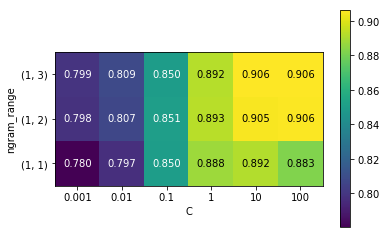

In [35]:
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

In [52]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.ylim(-22, 22)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [54]:
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)

NameError: name 'coef' is not defined

#### Advanced tokenization, stemming and lemmatization

In [55]:
import spacy
import nltk

# load spacy's English-language models
en_nlp = spacy.load('en')
# instantiate nltk's Porter stemmer
stemmer = nltk.stem.PorterStemmer()

# define function to compare lemmatization in spacy with stemming in nltk
def compare_normalization(doc):
    # tokenize document in spacy
    doc_spacy = en_nlp(doc)
    # print lemmas found by spacy
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # print tokens found by Porter stemmer
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [40]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'i', 'be', 'scar', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', "'m", 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [56]:
# Technicallity: we want to use the regexp based tokenizer
# that is used by CountVectorizer  and only use the lemmatization
# from SpaCy. To this end, we replace en_nlp.tokenizer (the SpaCy tokenizer)
# with the regexp based tokenization
import re
# regexp used in CountVectorizer:
regexp = re.compile('(?u)\\b\\w\\w+\\b')
# load spacy language model
en_nlp = spacy.load('en', disable=['parser', 'ner'])
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

# create a custom tokenizer using the SpaCy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=2)

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [57]:
# transform text_train using CountVectorizer with lemmatization
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# standard CountVectorizer for reference
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape: {}".format(X_train.shape))

NameError: name 'lemma_vect' is not defined

In [58]:
# build a grid-search using only 1% of the data as training set:
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# perform grid search with standard CountVectorizer
grid.fit(X_train, y_train)
print("Best cross-validation score "
      "(standard CountVectorizer): {:.3f}".format(grid.best_score_))
# perform grid search with Lemmatization
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
      "(lemmatization): {:.3f}".format(grid.best_score_))

ValueError: With n_samples=2, test_size=0.99 and train_size=0.01, the resulting train set will be empty. Adjust any of the aforementioned parameters.

### Topic Modeling and Document Clustering
#### Latent Dirichlet Allocation

In [59]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

ValueError: max_df corresponds to < documents than min_df

In [60]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=10, learning_method="batch",
                                max_iter=25, random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X)

TypeError: __init__() got an unexpected keyword argument 'n_topics'

In [43]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [47]:
# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

In [48]:
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
family        world         comedy        series        saw           
young         us            guy           episode       thought       
real          american      laugh         tv            am            
us            our           jokes         episodes      thing         
director      documentary   fun           shows         got           
work          history       humor         season        10            
both          years         re            new           want          
beautiful     new           hilarious     years         going         
each          human         doesn         television    watched       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

In [49]:
lda100 = LatentDirichletAllocation(n_topics=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [50]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [51]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

In [52]:
# sort by weight of "music" topic 45
music = np.argsort(document_topics100[:, 45])[::-1]
# print the five documents where the topic is most important
for i in music[:10]:
    # show first two sentences
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

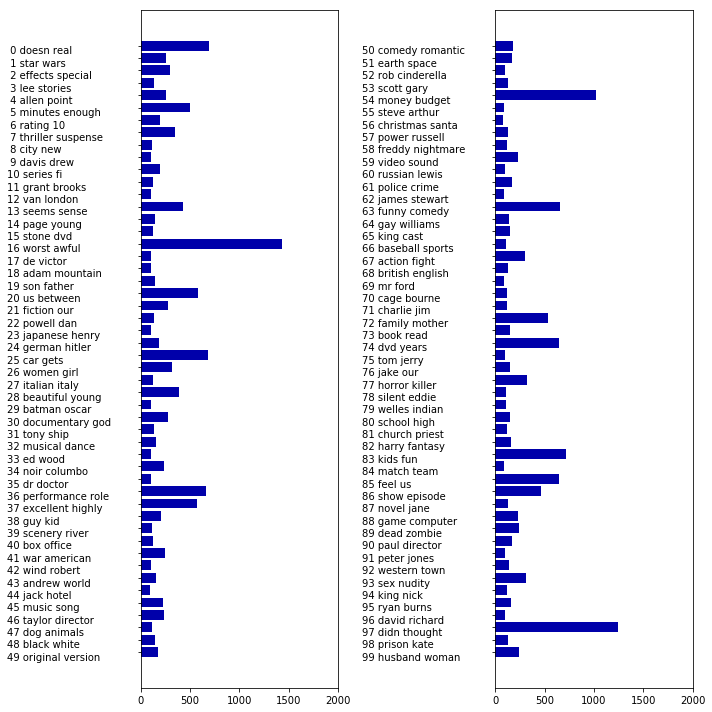

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

### Summary and Outlook